# Data Visualization Project: Analyzing French Cities

#### Link: https://www.kaggle.com/datasets/zakariakhodri3/french-cities-2005 

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
cities = pd.read_csv("./Matplotlib/data/french_cities.csv", sep=";", encoding='utf-8')
cities.head()

,Unnamed: 0,Postal Code,x,y,iseecode,place,population,surface,altitude
0,0,64460,-0.178823,0.707010,64001,Aast,190,4.89,380.0
1,1,55130,-0.098100,0.787263,55001,Abainville,318,13.67,290.0
2,2,59265,-0.119887,0.820176,59001,Abancourt,433,5.69,50.0
3,3,60220,-0.137328,0.813363,60001,Abancourt,567,5.96,210.0
4,4,54610,-0.088690,0.792684,54001,Abaucourt,309,7.96,190.0


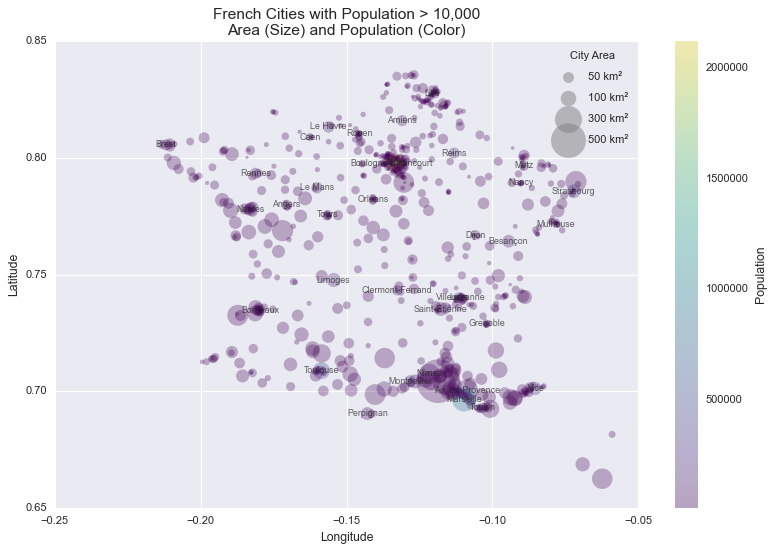

In [112]:
#Filtering cities with population > 10000
cities = cities[cities['population'] > 10000]

# Extract Latd and Longd
lat, lon = cities['y'], cities['x']

population, area = cities['population'], cities['surface']

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,7))

# Plot using Pyplot API
scatter = plt.scatter(lon, lat,
                      c=population, cmap='viridis',
                      s=area * 2, linewidths=0, alpha=0.3);

# Add names for large cities (population > 100,000)
for _, row in cities[cities['population'] > 100000].iterrows():
    plt.text(row['x'], row['y'], row['place'],
             fontsize=8, alpha=0.7, ha='center', va='center')
    
# Adding title and axes
plt.title('French Cities with Population > 10,000\nArea (Size) and Population (Color)', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude');


# Color bar for population
cbar = plt.colorbar(scatter)
cbar.set_label('Population')

# Legend of city sizes (areas in km²)
area_sizes = [50, 100, 300, 500]
for size in area_sizes:
    plt.scatter([], [], s=size * 2, c='gray', alpha=0.5,
                label=f'{size} km²')

plt.legend(scatterpoints=1, labelspacing=1, title='City Area')   # to display legend for cities'sizes 
plt.grid(True)                                                   # Add a grid to make reading easier
plt.tight_layout()                                               # Adjusts the layout well
plt.show()
